In [54]:
# Import stuff
import matplotlib.pyplot as plt
from skimage import exposure, io
from PIL import Image
from scipy.stats import norm
from torchvision import transforms

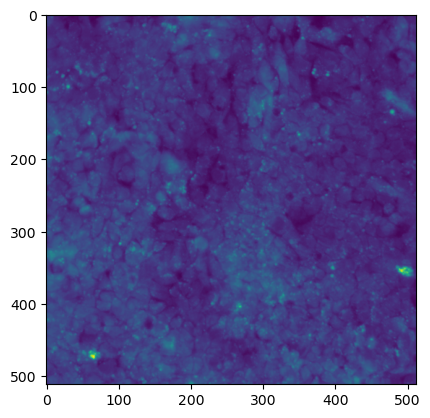

In [70]:
plt.imshow(image)

In [75]:
image = Image.open('data/train/HEPG2-01_1_B02_w6.png')

image = np.asarray(image)/255.0
print(image.shape)
image1 = exposure.equalize_adapthist(image, clip_limit=0.01)
print(image1.shape)
transforms.ToTensor()(image1)


(512, 512)
(512, 512)


tensor([[[0.3977, 0.3388, 0.3093,  ..., 0.1979, 0.2175, 0.2568],
         [0.3879, 0.3584, 0.3290,  ..., 0.1783, 0.1881, 0.2175],
         [0.3780, 0.3682, 0.3682,  ..., 0.1979, 0.1979, 0.1979],
         ...,
         [0.1356, 0.1552, 0.2067,  ..., 0.1690, 0.1788, 0.1886],
         [0.1356, 0.1552, 0.1969,  ..., 0.1493, 0.1591, 0.1493],
         [0.2362, 0.1675, 0.1871,  ..., 0.1395, 0.1493, 0.1493]]],
       dtype=torch.float64)

In [50]:
# Read the image
# image = io.imread('data/train/HEPG2-01_1_B02_w6.png', as_gray=True)
image = Image.open('data/train/HEPG2-01_1_B02_w6.png')
# image = image/255.0  # Normalize the image

# Get means and std
means = [image.mean()]
stds = [image.std()]

# print(f'Originial image    max,  min: {image.max()}, {image.min().round(3)}')
# print(f'                   mean, std: {image.mean().round(3)}, {image.std().round(3)}')


# Apply Adaptive Histogram Equalization (similar to CLAHE)
clahe_image = exposure.equalize_adapthist(image, clip_limit=0.03)

# Display the original and enhanced images
fig, axes = plt.subplots(2, 2, figsize=(10, 6), dpi=150)

axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

clips = [0.01, 0.03, 0.05]

row = 2
col = 2
r, c = 0, 1
for i in range(1, 4):
    clahe_image = exposure.equalize_adapthist(image, clip_limit=clips[i-1])
    # print(f'Clahe Image ({clips[i-1]}) max,  min: {clahe_image.max()}, {clahe_image.min()}')
    # print(f'                   mean, std: {clahe_image.mean().round(3)}, {clahe_image.std().round(3)}')
    
    means.append(clahe_image.mean())
    stds.append(clahe_image.std())
    
    axes[r, c].axis('off')
    axes[r, c].imshow(clahe_image, cmap='gray')
    axes[r, c].set_title(f'CLAHE Enhanced Image: clip = {clips[i-1]}')
    
    c += 1
    if c == col:
        c = 0
        r += 1
    
# ax[1].imshow(clahe_image, cmap='gray')
# ax[1].set_title('CLAHE Enhanced Image')
plt.tight_layout()
plt.show()


# Plot normal dists for each image.
types = ['Original', 'CLAHE 0.01', 'CLAHE 0.03', 'CLAHE 0.05']
plt.figure(figsize=(6, 4), dpi=150)
for i, ms in enumerate(zip(means, stds)):
    x = np.linspace(ms[0] - 3*ms[1], ms[0] + 3*ms[1], 100)
    plt.plot(x, norm.pdf(x, ms[0], ms[1]), label=f'{types[i]}')
plt.legend()
plt.title('Normal Distributions')
plt.show()

TypeError: unsupported operand type(s) for /: 'PngImageFile' and 'float'

In [15]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import data

# Load a sample image
image = io.imread('data/train/HEPG2-01_1_B02_w6.png', as_gray=True)

# Specify the offset (spatial relationship)
offset = (1, 0)

# Calculate the GLCM
glcm = greycomatrix(image, distances=[1], angles=[0], symmetric=True, normed=True)

# Extract GLCM features (contrast, homogeneity, energy, correlation)
contrast = greycoprops(glcm, 'contrast')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
energy = greycoprops(glcm, 'energy')[0, 0]
correlation = greycoprops(glcm, 'correlation')[0, 0]

print(f"Contrast: {contrast}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")


Contrast: 16.296901755136986
Homogeneity: 0.3428639009000686
Energy: 0.04404389959794382
Correlation: 0.9668623161111469


/Users/dylanskinner/opt/anaconda3/envs/acme1/lib/python3.7/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/Users/dylanskinner/opt/anaconda3/envs/acme1/lib/python3.7/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/dylanskinner/opt/anaconda3/envs/acme1/lib/python3.7/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/Users/dylanskinner/opt/anaconda3/envs/acme1/lib/python3.7/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed 